Mini Project 1: 
    Linear Regression Analysis
Unit: 
    Building Machine Learning Models with Scikit-learn
Objective: 
    Apply linear regression to predict housing prices using a real estate dataset.
Task: 
    - Obtain a dataset of housing prices, which includes features like square footage, 
    number of bedrooms, and location. - Use linear regression to predict house prices based on these features. 
    - Analyze the accuracy of the predictions and discuss potential improvements.
Deliverable: 
    A Jupyter Notebook documenting the analysis, including data preprocessing, 
    model fitting, prediction, and a discussion on the model accuracy and potential biases.

##### Looking at the problem i can tell that we have been given a Supervised Learning type ML Problem
##### And it is a Regression Problem since we are building a Predictive Model for future Housing Prices
##### Meaning that we are Predicting a Continuos Variable
##### And our target variable is the Feature called "Price" on our Housing Dataset

In [9]:
# Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import os

# **Reading Data**

In [10]:
# Loading the Dataset

df = pd.read_csv('kc_house_data.csv')

In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# DATA PREPARATION/DATA PRE-PROCESSING(DATA CLEANING)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
df.drop(["date", "id"], axis=1, inplace=True)

In [14]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

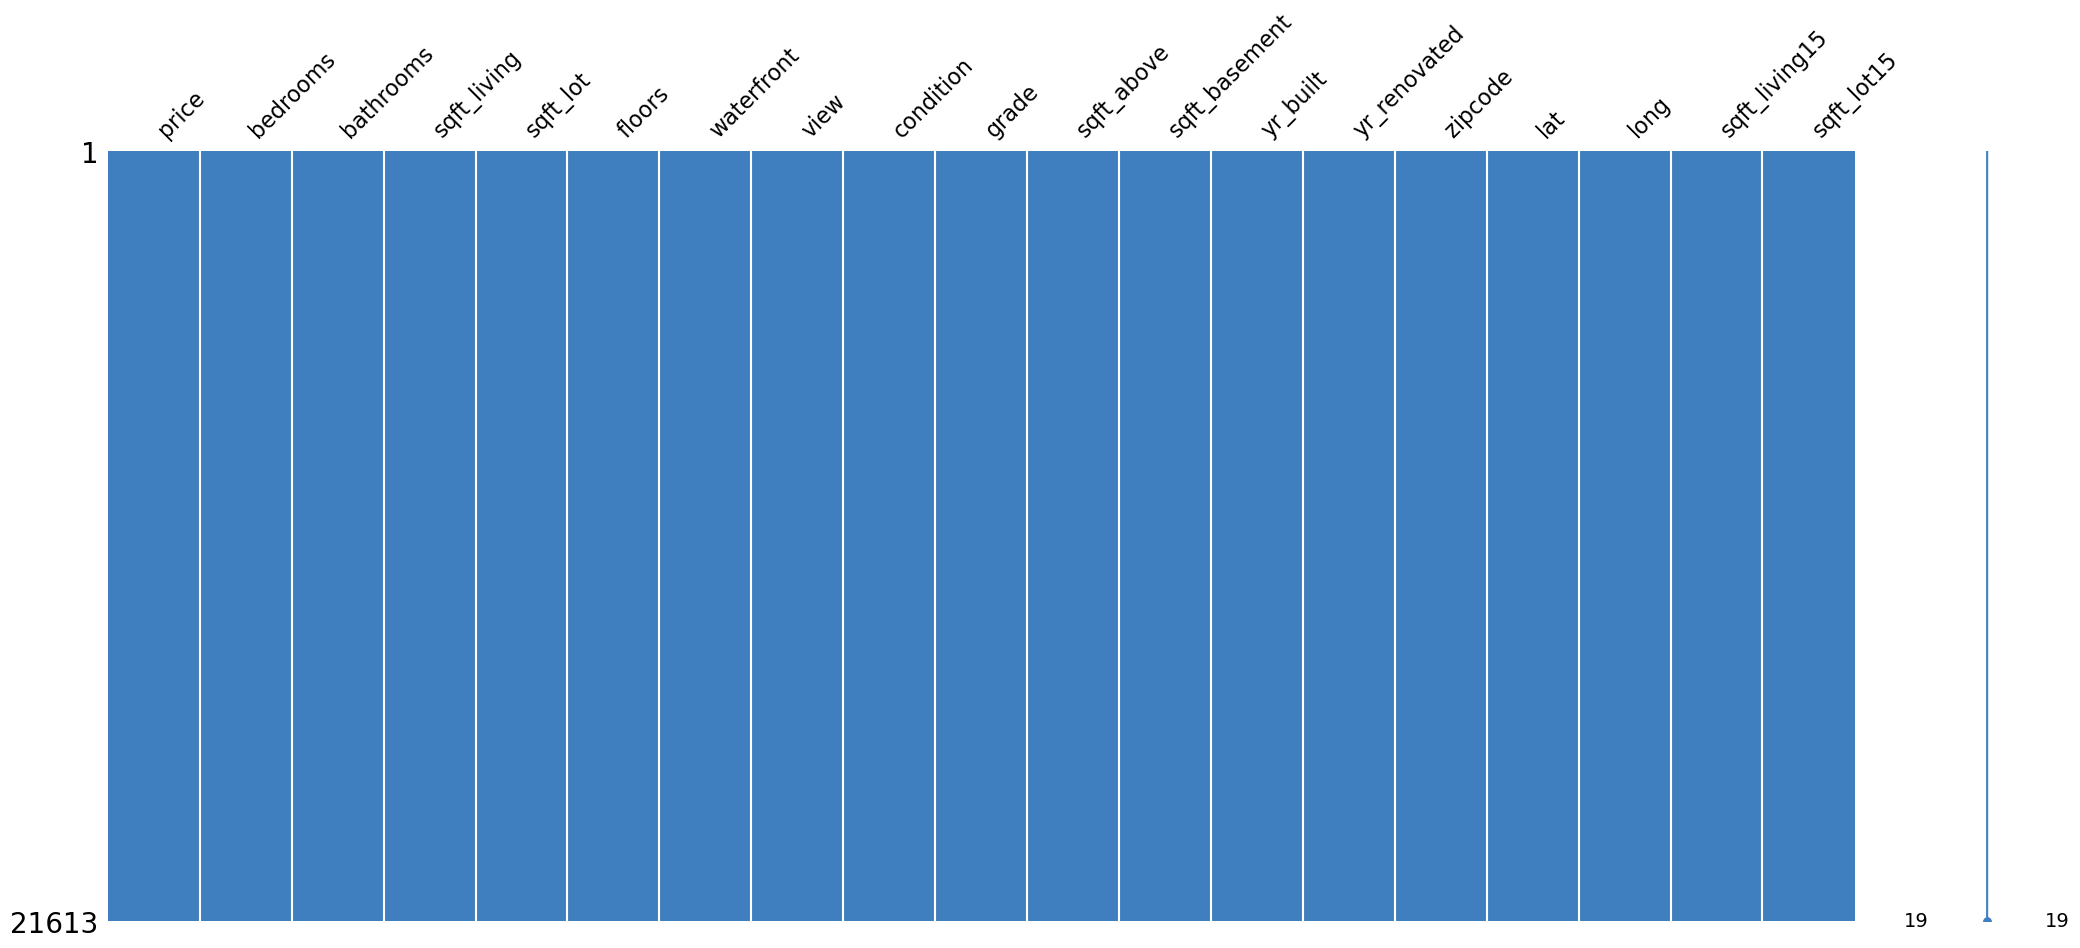

In [15]:
import missingno
missingno.matrix(df, color=(0.25, 0.50, 0.75))

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Correlation Matrix**

Text(0.5, 1.0, 'Correlation')

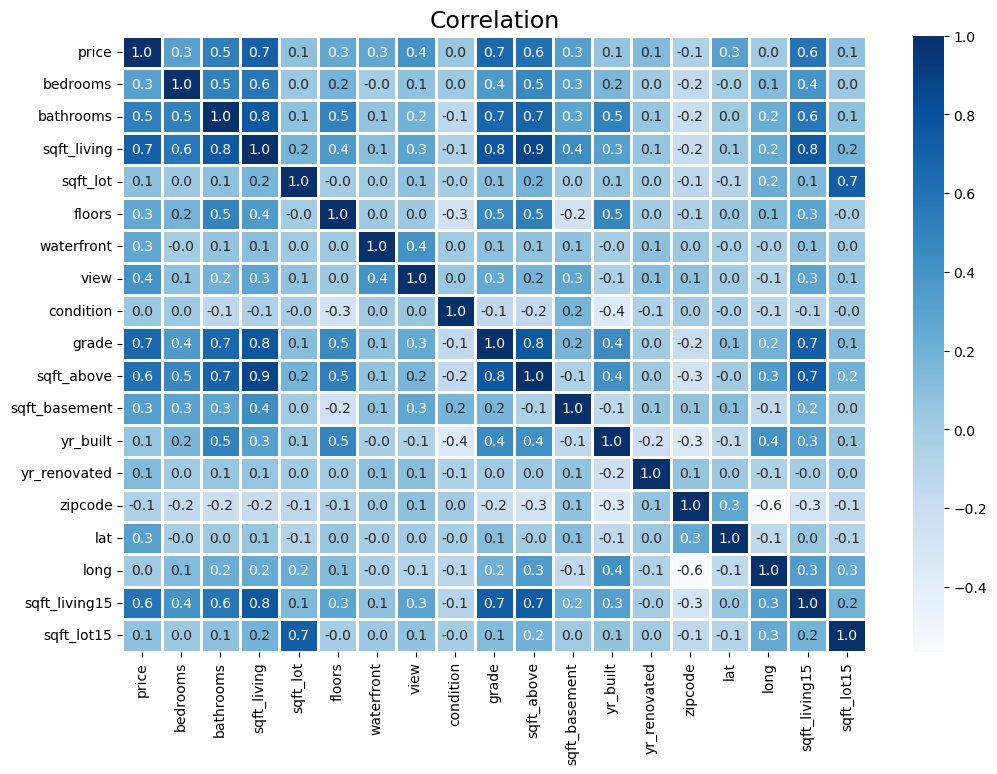

In [17]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".1f", linewidth=1)
plt.title("Correlation", fontsize=17)

# **Splitting Data**

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
X = df.drop(["price", "zipcode"], axis=1)
y = df["price"]

In [20]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

# **Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
lrs = model.score(X_test, y_test)

# **Random Forest Regression**

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfrs = rfr.score(X_test, y_test)

# **Scores of Model**

(0.6889316995334259, 0.8915998312445084)

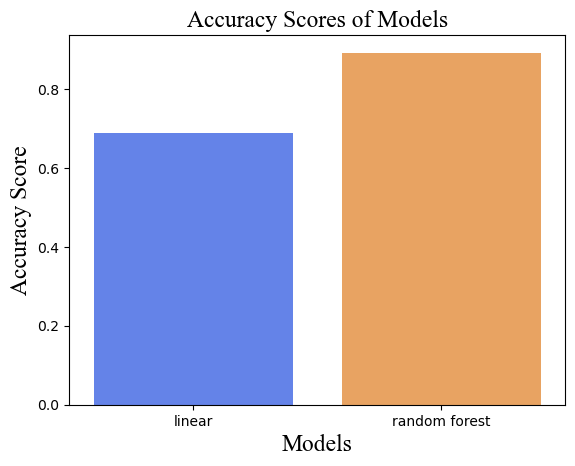

In [26]:
index = ["linear", "random forest"]
values = [lrs, rfrs]
sns.barplot(x=index, y=values, alpha=0.7, palette="bright")
plt.title("Accuracy Scores of Models", fontsize=17, fontname="Times New Roman")
plt.ylabel("Accuracy Score", fontsize=17, fontname="Times New Roman")
plt.xlabel("Models", fontsize=17, fontname="Times New Roman")
lrs, rfrs

# **A Cool Thing**

In [27]:
df = pd.get_dummies(df, columns=["zipcode"], drop_first=True)

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,False,False,False,False,False,False,True,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8111698868371541